# 06. Prediction Models (Forecasting)

In [1]:
import sys
import os
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Add project root to sys.path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

print(f"Project Root: {project_root}")


Project Root: c:\Users\Kaustab das\Desktop\Aadhaar Pulse AI


In [2]:
import matplotlib.pyplot as plt

In [3]:
# Load Processed Data
processed_path = os.path.join(project_root, 'data', 'processed', 'merged_master_table.csv')
if os.path.exists(processed_path):
    df = pd.read_csv(processed_path)
    if 'date' in df.columns:
        df['date'] = pd.to_datetime(df['date'])
    print(f"Data Loaded: {df.shape}")
else:
    print("Error: Processed data not found. Please run run_pipeline.py first.")


Data Loaded: (2947681, 15)


## 6.1 District-level Demand Forecasting

Forecasting for: East Khasi Hills


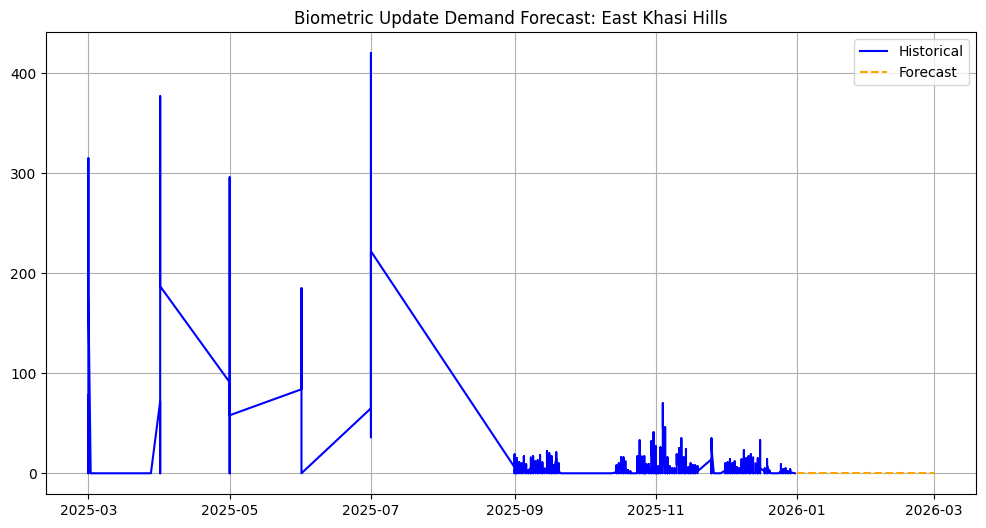

,date,predicted_demand
0,2026-01-01,0
1,2026-01-02,0
2,2026-01-03,0
3,2026-01-04,0
4,2026-01-05,0


In [4]:
from src.models.forecasting import predict_biometric_demand

# Pick a district with enough data
district_list = df['district'].unique()
sample_district = district_list[0]
print(f"Forecasting for: {sample_district}")

hist_data, forecast = predict_biometric_demand(df, sample_district, days_ahead=60)

if forecast is not None:
    plt.figure(figsize=(12, 6))
    plt.plot(hist_data['date'], hist_data['total_bio_updates'], label='Historical', color='blue')
    plt.plot(forecast['date'], forecast['predicted_demand'], label='Forecast', color='orange', linestyle='--')
    plt.title(f"Biometric Update Demand Forecast: {sample_district}")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    display(forecast.head())
else:
    print("Insufficient data for this district.")
